In [143]:
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib

final_data = pd.read_csv('../data/final_processing_afterfeatureselection.csv')
final_data

,PC1,PC2,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,condition
0,-0.039233,-0.253788,-0.700899,0.301111,-0.839961,0.688526,-0.810877,0.156861,-0.207767,1.431996,0.352972,0.614194,0.381826,-0.038288,-0.145796,0
1,-1.141627,-0.809808,0.344283,0.196894,-0.099172,-0.798856,-0.473560,-0.336210,0.258290,-0.100696,-0.555420,-0.648638,0.670350,0.226474,0.100075,1
2,-1.868282,-0.323053,0.142862,0.052773,0.159603,0.079444,-0.003839,-0.069681,0.851798,-0.242212,0.014812,0.007963,-0.295652,0.084054,-0.171274,1
3,0.902116,0.610200,-0.617978,0.342487,-0.382084,-0.433267,0.038261,-0.507393,0.169220,0.991255,-0.374363,-0.248837,-0.561927,-0.284056,0.240965,0
4,1.298818,-0.884515,0.469796,0.341791,0.323519,0.306327,0.118823,0.802930,0.027827,-0.051346,-0.174917,0.067726,-0.016932,-0.187003,0.061194,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,-0.241793,0.876853,-1.102780,0.547618,0.337560,0.207472,-0.028955,0.236387,0.073171,0.198052,0.836868,-0.197183,0.327486,-0.216300,-0.261663,1
299,-0.986426,0.690337,-0.710955,-0.726882,-0.074197,1.048600,-1.105459,-0.353621,0.195977,-0.270145,0.101315,-0.084849,-0.398143,0.198260,0.046050,1
300,-1.604664,0.756485,0.089254,-0.446223,0.180731,-0.535324,0.116328,0.152382,-0.331112,-0.020602,0.125362,-0.047554,-0.075621,0.018241,-0.055046,1
301,0.398393,-1.331490,-0.341713,-0.655132,0.767891,-0.481505,-0.246584,1.034815,-0.227725,-0.023999,-0.094172,-0.001797,-0.172947,-0.134631,0.111055,1


In [144]:
x = final_data.drop(columns=['condition'])
y = final_data['condition']

In [145]:
x

,PC1,PC2,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
0,-0.039233,-0.253788,-0.700899,0.301111,-0.839961,0.688526,-0.810877,0.156861,-0.207767,1.431996,0.352972,0.614194,0.381826,-0.038288,-0.145796
1,-1.141627,-0.809808,0.344283,0.196894,-0.099172,-0.798856,-0.473560,-0.336210,0.258290,-0.100696,-0.555420,-0.648638,0.670350,0.226474,0.100075
2,-1.868282,-0.323053,0.142862,0.052773,0.159603,0.079444,-0.003839,-0.069681,0.851798,-0.242212,0.014812,0.007963,-0.295652,0.084054,-0.171274
3,0.902116,0.610200,-0.617978,0.342487,-0.382084,-0.433267,0.038261,-0.507393,0.169220,0.991255,-0.374363,-0.248837,-0.561927,-0.284056,0.240965
4,1.298818,-0.884515,0.469796,0.341791,0.323519,0.306327,0.118823,0.802930,0.027827,-0.051346,-0.174917,0.067726,-0.016932,-0.187003,0.061194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,-0.241793,0.876853,-1.102780,0.547618,0.337560,0.207472,-0.028955,0.236387,0.073171,0.198052,0.836868,-0.197183,0.327486,-0.216300,-0.261663
299,-0.986426,0.690337,-0.710955,-0.726882,-0.074197,1.048600,-1.105459,-0.353621,0.195977,-0.270145,0.101315,-0.084849,-0.398143,0.198260,0.046050
300,-1.604664,0.756485,0.089254,-0.446223,0.180731,-0.535324,0.116328,0.152382,-0.331112,-0.020602,0.125362,-0.047554,-0.075621,0.018241,-0.055046
301,0.398393,-1.331490,-0.341713,-0.655132,0.767891,-0.481505,-0.246584,1.034815,-0.227725,-0.023999,-0.094172,-0.001797,-0.172947,-0.134631,0.111055


In [146]:
y

0      0
1      1
2      1
3      0
4      0
      ..
298    1
299    1
300    1
301    1
302    0
Name: condition, Length: 303, dtype: int64

In [147]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.85      0.89        33
           1       0.84      0.93      0.88        28

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61
 

Accuracy: 0.8852459016393442
Precision: 0.8387096774193549
Recall: 0.9285714285714286
f1 Score: 0.8813559322033898


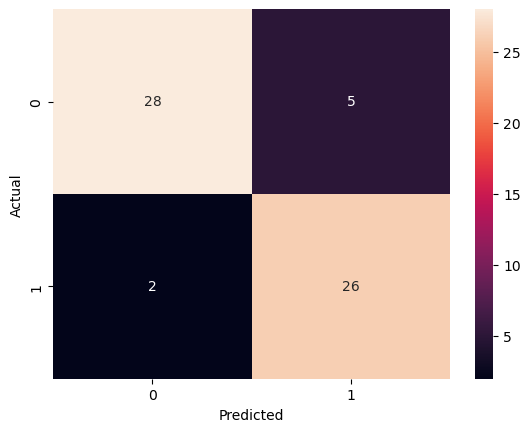

[0.         0.         0.         0.03030303 0.03030303 0.06060606
 0.06060606 0.09090909 0.09090909 0.12121212 0.12121212 0.15151515
 0.15151515 0.36363636 0.36363636 1.        ]
[0.         0.03571429 0.60714286 0.60714286 0.67857143 0.67857143
 0.82142857 0.82142857 0.85714286 0.85714286 0.89285714 0.89285714
 0.96428571 0.96428571 1.         1.        ]
[       inf 0.98953398 0.89940313 0.88405898 0.86211368 0.8029274
 0.65920114 0.65220002 0.64766339 0.60352293 0.58541577 0.58291605
 0.45044549 0.22609581 0.22389456 0.01232253]
AUC: 0.9577922077922079


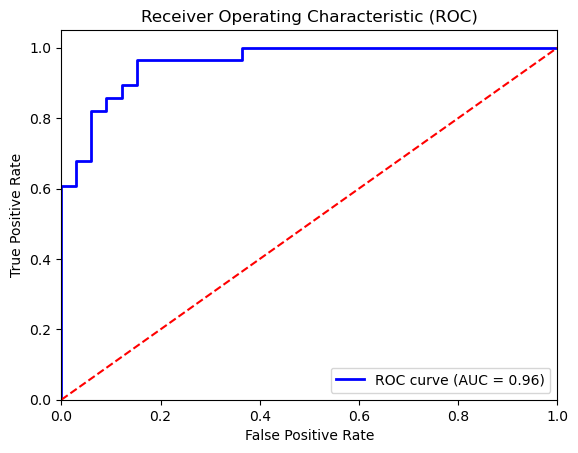

['../models/supervised_logisticregression.pkl']

In [155]:
from sklearn.linear_model import LogisticRegression

log_model =  LogisticRegression(random_state=42)
log_model.fit(x_train, y_train)

y_pred = log_model.predict(x_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred), '\n')

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('f1 Score:', f1_score(y_test, y_pred))

cm= confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

y_pred_prob = log_model.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
print(fpr)
print(tpr)
print(thresholds)
print('AUC:', auc(fpr, tpr))

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc(fpr, tpr):.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

joblib.dump(log_model, "../models/supervised_logisticregression.pkl")


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.85      0.90        33
           1       0.84      0.96      0.90        28

    accuracy                           0.90        61
   macro avg       0.90      0.91      0.90        61
weighted avg       0.91      0.90      0.90        61
 

Accuracy: 0.9016393442622951
Precision: 0.84375
Recall: 0.9642857142857143
f1 Score: 0.9


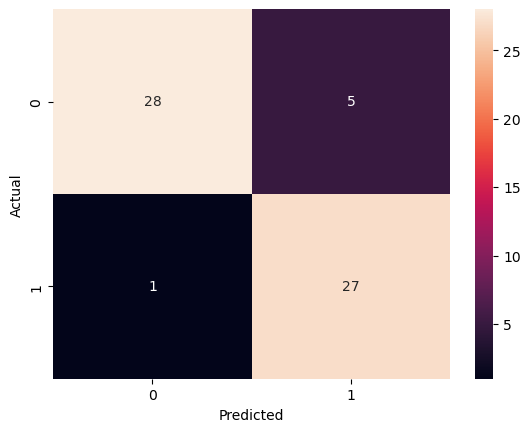

[0.         0.15151515 1.        ]
[0.         0.96428571 1.        ]
[inf  1.  0.]
AUC: 0.9063852813852814


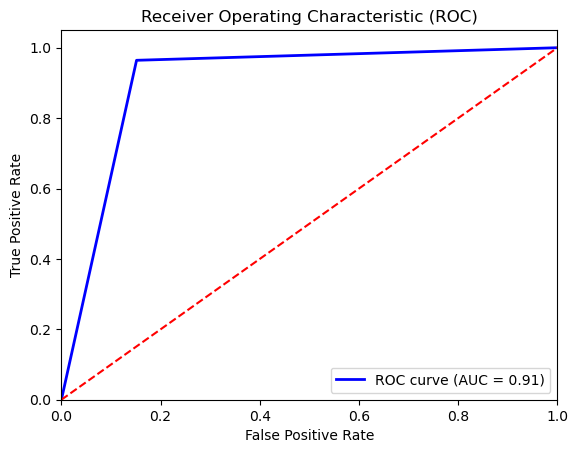

['../models/supervised_decisiontree.pkl']

In [149]:
from sklearn.tree import DecisionTreeClassifier

dec_model =  DecisionTreeClassifier(random_state=42)
dec_model.fit(x_train, y_train)

y_pred = dec_model.predict(x_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred), '\n')

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('f1 Score:', f1_score(y_test, y_pred))

cm= confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


y_pred_prob = dec_model.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
print(fpr)
print(tpr)
print(thresholds)
print('AUC:', auc(fpr, tpr))

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc(fpr, tpr):.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

joblib.dump(dec_model, "../models/supervised_decisiontree.pkl")


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.88      0.92        33
           1       0.87      0.96      0.92        28

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61
 

Accuracy: 0.9180327868852459
Precision: 0.8709677419354839
Recall: 0.9642857142857143
f1 Score: 0.9152542372881356


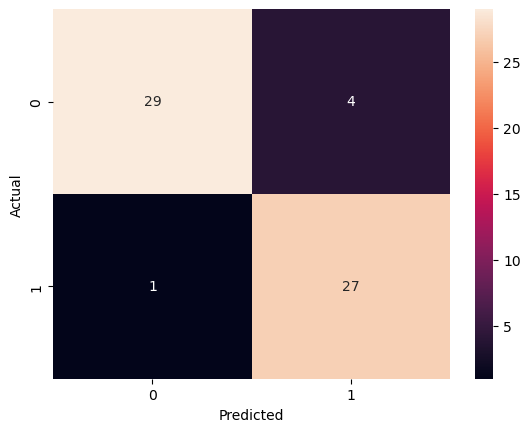

[0.         0.         0.         0.03030303 0.03030303 0.06060606
 0.06060606 0.09090909 0.09090909 0.09090909 0.09090909 0.09090909
 0.12121212 0.12121212 0.15151515 0.18181818 0.24242424 0.27272727
 0.33333333 0.66666667 0.72727273 0.81818182 0.87878788 0.90909091
 0.96969697 1.        ]
[0.         0.03571429 0.17857143 0.28571429 0.32142857 0.39285714
 0.53571429 0.53571429 0.60714286 0.67857143 0.85714286 0.92857143
 0.92857143 0.96428571 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.        ]
[ inf 0.99 0.92 0.88 0.84 0.83 0.77 0.76 0.74 0.72 0.6  0.57 0.55 0.53
 0.49 0.47 0.42 0.38 0.37 0.12 0.11 0.05 0.03 0.02 0.01 0.  ]
AUC: 0.9404761904761905


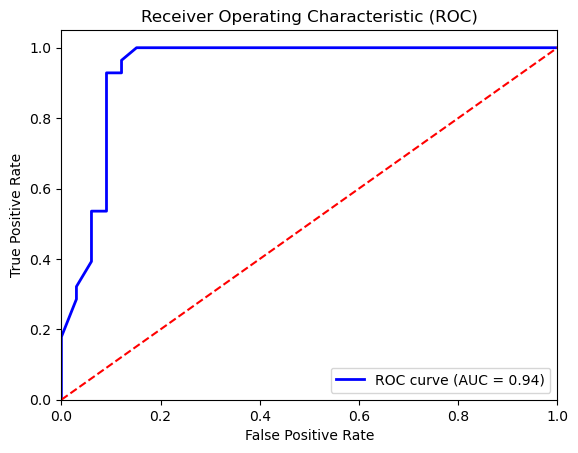

['../models/supervised_randomforest.pkl']

In [150]:
from sklearn.ensemble import RandomForestClassifier

RF_model =  RandomForestClassifier(random_state=42)
RF_model.fit(x_train, y_train)

y_pred = RF_model.predict(x_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred), '\n')

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('f1 Score:', f1_score(y_test, y_pred))

cm= confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

y_pred_prob = RF_model.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
print(fpr)
print(tpr)
print(thresholds)
print('AUC:', auc(fpr, tpr))

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc(fpr, tpr):.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

joblib.dump(RF_model, "../models/supervised_randomforest.pkl")


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.85      0.90        33
           1       0.84      0.96      0.90        28

    accuracy                           0.90        61
   macro avg       0.90      0.91      0.90        61
weighted avg       0.91      0.90      0.90        61
 

Accuracy: 0.9016393442622951
Precision: 0.84375
Recall: 0.9642857142857143
f1 Score: 0.9


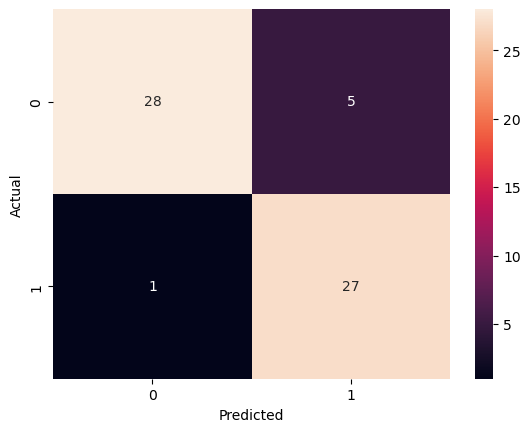

[0.         0.         0.         0.03030303 0.03030303 0.06060606
 0.06060606 0.15151515 0.15151515 0.27272727 0.27272727 1.        ]
[0.         0.03571429 0.46428571 0.46428571 0.67857143 0.67857143
 0.89285714 0.89285714 0.96428571 0.96428571 1.         1.        ]
[        inf  1.80255866  0.96537446  0.94954223  0.75694891  0.57750966
  0.20061933  0.07057161  0.0112022  -0.33016055 -0.36045021 -1.69299882]
AUC: 0.9599567099567099


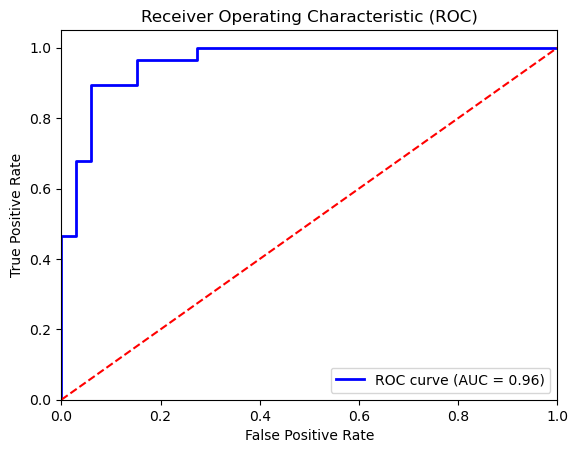

['../models/supervised_linearsvc.pkl']

In [151]:
from sklearn.svm import LinearSVC

svc_model =  LinearSVC(random_state=42)
svc_model.fit(x_train, y_train)

y_pred = svc_model.predict(x_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred), '\n')

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('f1 Score:', f1_score(y_test, y_pred))

cm= confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


y_pred_prob = svc_model.decision_function(x_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
print(fpr)
print(tpr)
print(thresholds)
print('AUC:', auc(fpr, tpr))

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc(fpr, tpr):.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

joblib.dump(svc_model, "../models/supervised_linearsvc.pkl")


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        33
           1       0.86      0.86      0.86        28

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61
 

Accuracy: 0.8688524590163934
Precision: 0.8571428571428571
Recall: 0.8571428571428571
f1 Score: 0.8571428571428571


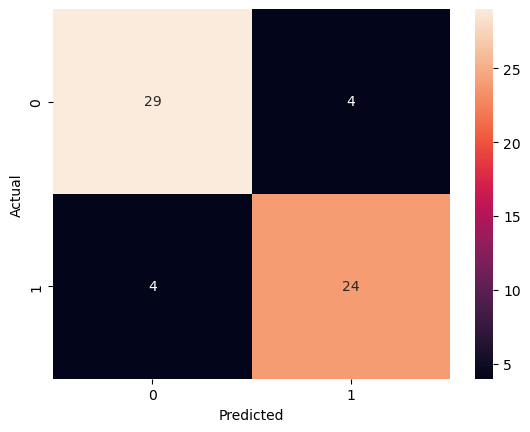

[0.         0.         0.         0.03030303 0.03030303 0.06060606
 0.06060606 0.09090909 0.09090909 0.12121212 0.12121212 0.15151515
 0.15151515 0.18181818 0.18181818 0.21212121 0.21212121 0.66666667
 0.66666667 1.        ]
[0.         0.03571429 0.39285714 0.39285714 0.46428571 0.46428571
 0.67857143 0.67857143 0.82142857 0.82142857 0.85714286 0.85714286
 0.89285714 0.89285714 0.92857143 0.92857143 0.96428571 0.96428571
 1.         1.        ]
[       inf 0.96407946 0.88611848 0.86824257 0.86165586 0.85725875
 0.79293245 0.76419587 0.59789339 0.57326116 0.50875546 0.48782148
 0.45833526 0.45517323 0.42640632 0.39993101 0.39889549 0.1205261
 0.10402314 0.05845958]
AUC: 0.9242424242424242


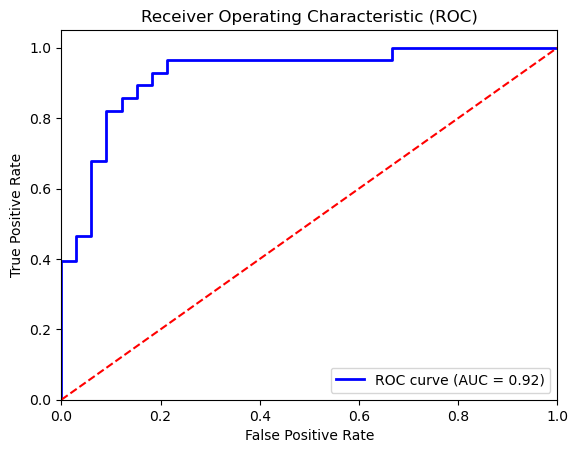

['../models/supervised_svc.pkl']

In [152]:
from sklearn.svm import SVC

svc_model =  SVC(random_state=42, probability=True)
svc_model.fit(x_train, y_train)

y_pred = svc_model.predict(x_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred), '\n')

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('f1 Score:', f1_score(y_test, y_pred))

cm= confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


y_pred_prob = svc_model.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
print(fpr)
print(tpr)
print(thresholds)
print('AUC:', auc(fpr, tpr))

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc(fpr, tpr):.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

joblib.dump(svc_model, "../models/supervised_svc.pkl")